In [2]:
"""
    数据处理
        - 算数平均值
        - 加权平均值
        - 最值
        - 中位数
        - 标准差
        - 时间数据处理
        - 移动均线
        - 卷积
        - 布林带
        - 线性模型
        - 协方差、相关矩阵、相关系数
        - 多项式拟合
        - 数据平滑
        - 符号数组
        - 矢量化
        - 通用函数
        - 特征值和特征向量
        - 奇异值分解
        - 快速傅里叶变换(fft)
        - 随机数模块(random)
        - 杂项功能
"""

'\n    数据处理\n        - 算数平均值\n        - 加权平均值\n        - 最值\n        - 中位数\n        - 标准差\n        - 时间数据处理\n        - 移动均线\n        - 卷积\n        - 布林带\n        - 线性模型\n        - 协方差、相关矩阵、相关系数\n        - 多项式拟合\n        - 数据平滑\n        - 符号数组\n        - 矢量化\n        - 通用函数\n        - 特征值和特征向量\n        - 奇异值分解\n        - 快速傅里叶变换(fft)\n        - 随机数模块(random)\n        - 杂项功能\n'

'\n    数据处理\n        - 算数平均值\n        - 加权平均值\n        - 最值\n        - 中位数\n        - 标准差\n        - 时间数据处理\n        - 移动均线\n        - 卷积\n        - 布林带\n        - 线性模型\n        - 协方差、相关矩阵、相关系数\n        - 多项式拟合\n        - 数据平滑\n        - 符号数组\n        - 矢量化\n        - 通用函数\n        - 特征值和特征向量\n        - 奇异值分解\n        - 快速傅里叶变换(fft)\n        - 随机数模块(random)\n        - 杂项功能\n'

In [4]:
"""
    算数平均值   表示对真值的无偏估计
        np.mean()
"""
from datetime import datetime
import numpy as np
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volumns=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})
means=np.mean(close_prices)
print(means)


351.0376666666667


In [5]:
"""
    加权平均值
        样本:         S = [S₁,S₂,...,Sn]
        权重:         W = [W₁,W₂,...,Wn]
        加权平均值：   (S₁W₁+S₂W₂+...+SnWn)/(W₁+W₂+...+Wn)
        np.average(a,weight)
            - a             数据
            - weight        权重

"""
import numpy as np
from matplotlib import pyplot as plt
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
#成交量作为加权平均值权重(成交量体现了市场对当前交易价格的认可度，成交量加权平均价格将会更接近这只股票的真实价值)
dates,opening_prices,highest_prices,lowest_prices,close_prices,volumns=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})
vwap = np.average(close_prices,weights=volumns)

#时间加权平均价格(时间越晚权重越高，参考意义越大)
times = np.linspace(1,10,close_prices.size)

twap  = np.average(close_prices,weights=times)
twap

352.17547544409615

In [6]:
"""
    最值
        返回一个数组中最大值/最小值/极差
            np.max()            最大值
            np.min()            最小值
            np.ptp()            极差
        返回一个数组中最大/最小元素的下标
            np.argmax()         最大元素下标
            np.argmin()         最小元素下标
        将两同维数组中对应元素中最大/最小元素构成一个新的数组
            np.maximum()
            np.minimum()


"""
import numpy as np
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})
#评估波动性
min_val = np.min(lowest_prices)
max_val = np.max(highest_prices)
# print(min_val , " ~ " ,max_val)

#最高价与最低价日期
min_ind = np.argmin(lowest_prices)
max_ind = np.argmax(highest_prices)
# print(dates[min_ind]," ",dates[max_ind])

# np.maximum()
# np.minimum()
a= np.arange(9).reshape(3,3)
b = np.arange(9)[::-1].reshape(3,3)
print(np.maximum(a,b))
print(np.minimum(a,b))


[[8 7 6]
 [5 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 3]
 [2 1 0]]


In [7]:
"""
    中位数 将多个样本按照大小排序，取中间位置的元素
        - 若样本数量为奇数,中位数为中间的数
        - 若样本数量为偶数,中位数为最中间的两个元素的平均值
            - np.median()
            - np.msort()    排序

"""
from datetime import datetime
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv"
                                                                                 ,delimiter=",",usecols=(1,3,4,5,6,7),
                                                                                 dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,
                                                                                 converters={1:dmy2ymd})
#第一种
sorted_price = np.msort(close_prices)
size = sorted_price.size
median=(sorted_price[int((size-1)/2)]+sorted_price[int(size/2)])/2
print(median)
#第二种
median=np.median(close_prices)
print(median)

352.055
352.055


In [11]:
"""
    标准差
        - 样本
            S = [S₁,S₂,...,Sn]
        - 平均值
            m = (S₁+S₂+...+Sn)/n
        - 离差
            D =[d₁,d₂,...,dn]  di = Si - m
        - 离差方
            Q = [q₁,q₂,...,qn],qi = di ** 2
        - 总体方差
            v = (q₁+q₂+...+qn)/n
        - 总体标准差
            s = sqrt(v)    方均根
        - 样本方差
            v' = (q₁+q₂+...+qn)/(n-1)
        - 样本标准差
            s' = sqrt(v')  方均根
    标准差函数
        - np.std()

"""
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv"
                                                                                 ,delimiter=",",usecols=(1,3,4,5,6,7),
                                                                                 dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,
                                                                                 converters={1:dmy2ymd})

#手动计算
mean = np.mean(close_prices)            # 计算平均值
d =  close_prices - mean                # 计算离差
q = d**2                                # 计算离差方
v = np.sum(q)/q.size                    # 计算总体方差
v1 = np.sum(q)/(q.size-1)               # 样本方差
s = np.sqrt(v)                          # 计算总体标准差
s1 = np.sqrt(v1)                        # 样本标准差
print(s)


#计算标准差
np.std(close_prices)                    # 总体标准差
np.std(close_prices,ddof=1)             # 样本标准差

7.080008325481608


7.201042876260849

In [12]:
"""
    时间数据处理
"""
import numpy as np
from datetime import datetime
def dmy2wday(dmy):
    dmy = str(dmy,encoding="utf-8")
    date = datetime.strptime(dmy,"%d-%m-%Y").date()
    wday = date.weekday()
    return wday
wdays,closing_price = np.loadtxt("da_data/aapl.csv",delimiter=",",usecols=(1,6),unpack=True,converters={1:dmy2wday})
# print(wdays)
ave_prices = np.zeros(5)

for i in range(ave_prices.size):
    ave_prices[i]=closing_price[wdays == i].mean()
print(ave_prices)

"""
    数组的轴向汇总
    - np.apply_along_axis(func,axis,array)
        - func          处理函数
        - axis          轴向[0,1]
        - array         数组



"""
def func(data):
    return data.mean()
np.apply_along_axis(func,axis=0,arr=closing_price)


[351.79       350.635      352.13666667 350.89833333 350.02285714]


array(351.03766667)

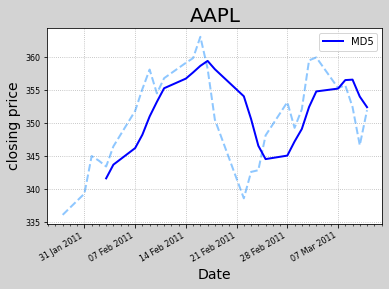

In [13]:
"""
    移动均线
        - 收盘价5日均线：从第五天开始，每天计算最近五天的收盘价的平均值所构成的一条线
    移动均线算法
        （a+b+c+d+e)/5
        （b+c+d+e+f)/5
        （c+d+e+f+g)/5
         ...
         (f+g+h+i+j)/5

"""
#在k线图中绘制5日均线图
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})

#绘制直线图
from matplotlib import pyplot as plt
from matplotlib import dates as dts
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=14)
plt.ylabel("closing price",fontsize = 14)
plt.grid(linestyle=":")
#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( dts.WeekdayLocator(byweekday=dts.MO) )
ax.xaxis.set_major_formatter(dts.DateFormatter('%d %b %Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(dts.datetime.datetimedatetime)
plt.plot(dates, close_prices, color='dodgerblue',
		linestyle='--',linewidth=2,alpha=0.5)


#绘制移动均线
ma5 = np.zeros(close_prices.size - 4)    #用于第5天到第26天的数据

for i in range(ma5.size):
    #前5日均线从第五日开始画图
    ma5[i]=close_prices[i:i+5].mean()
plt.plot(dates[4:],ma5,color="blue",linestyle="-",linewidth=2,label="MD5")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()



In [14]:
"""
    卷积
        例子：
            a = [1 2 3 4 5]  源数组
            b = [6 7 8]      卷积核数组
            使用b作为卷积核，对a数组执行卷积运算的运算过程如下：
                - 源数组和卷积核数组对应位置相乘再相加

                                44  65  86                   卷积结果(有效卷积 valid)
                            23  44  65  86  59               卷积结果(同维卷积 same)
                        8   23  44  65  86  59  30           卷积结果(完全卷积 full)
                0   0   1   2   3   4   5   0   0            将源数组补0
                6   7   8                                    将卷积核数组翻转
                    6   7   8
                        6   7   8
                            6   7   8
                                6   7   8
                                    6   7   8
                                        6   7   8

        - np.convolve(a,b,卷积类型)
    加权卷积
        - 卷积核数组值不相同
    多维卷积
        - 类似一维卷积

    激励函数:g(t)

"""
#非加权卷积
a = [1,2,3,4,5]  #源数组
b= [1,1,1]       #卷积核数组
print(np.convolve(a, b, mode="valid"))


#加权卷积
a = [1,2,3,4,5]  #源数组
b= [8,7,6]       #卷积核数组
import numpy as np
np.convolve(a,b,mode="full")



[ 6  9 12]


array([ 8, 23, 44, 65, 86, 59, 30])

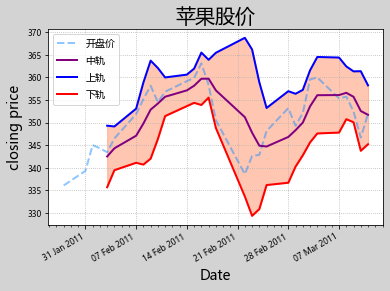

In [15]:
"""
    布林带
        布林带有三条线组成：
            - 中轨          移动平均线
            - 上轨          中轨+2x5日收盘价标准差(顶部的压力)
            - 下轨          中轨-2x5日收盘价标准差(底部的支撑力)
        布林带收窄代表稳定的趋势,布林带张开代表有较大的波动空间的趋势
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as dts
import matplotlib
matplotlib.rc("font",family='Microsoft YaHei')
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})

#绘制直线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("苹果股价",fontsize=20)
plt.xlabel("Date",fontsize=14)
plt.ylabel("closing price",fontsize = 14)
plt.grid(linestyle=":")
#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( dts.WeekdayLocator(byweekday=dts.MO) )
ax.xaxis.set_major_formatter(dts.DateFormatter('%d %b %Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(dts.datetime.datetime)
plt.plot(dates, close_prices, color='dodgerblue',
		linestyle='--',linewidth=2,alpha=0.5,label="开盘价")





x = np.linspace(-1,0,5)
kernel = np.exp(x)[::-1]   #y=e**x在-1到0是y的值波动范围小
kernel = kernel/kernel.sum()
sma53 = np.convolve(close_prices,kernel,mode="value")
plt.plot(dates[4:],sma53,color="purple",linestyle="-",linewidth=2,label="中轨")
# plt.bar(dates,close_prices-opening_prices,linewidth=0.8,color=color,bottom=opening_prices,edgecolor=edgecolor,zorder=3)
#绘制影线
# plt.vlines(dates,ymin=lowest_prices,ymax=highest_prices,color=edgecolor)


#绘制上轨和下轨
stds = np.zeros(sma53.size)
for i in range(stds.size):
    stds[i]=close_prices[i:i+5].std()
upper = sma53 + 2 * stds
lower = sma53 - 2 * stds
plt.plot(dates[4:],upper,color="blue",linestyle="-",linewidth=2,label="上轨")
plt.plot(dates[4:],lower,color="red",linestyle="-",linewidth=2,label="下轨")
plt.fill_between(dates[4:],upper,lower,lower< upper,color="orangered",alpha=0.3)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:86: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:109: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


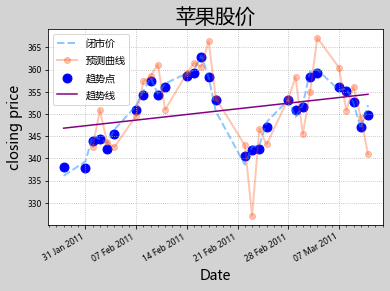

In [16]:
"""
    线性模型
        - 线性预测  假设一组数据符合一种线性规律，那么就可以预测未来将会出现的数据
            例如:
                a   b   c   d   e   f   ?
                ax + by + cz = d
                bx + cy + dz = e
                cx + dy + ez = f
                | a   b   c |          | x |           | d |
                | b   c   d |    x     | y |     =     | e |      （1）
                | c   d   e |          | z |           | f |
                根据线性模型的特点可以通过一组历史数据求出线性关系系数x,y,z,从而预测d,e,f的一个数据是多少
            - 解方程组函数
                - np.linalg.lstsq(A,B)[0]
            - 矩阵点乘函数
                - np.dot(a,b)
        - 线性拟合  寻求与一组散点走向趋势规律相适应的线性表达式方程
            例如:
                有一组散点描述时间序列下的股价：
                    [x₁, y₁]
                    [x₂, y₂]
                    [x₃, y₃]
                    ...
                    [xn, yn]
                根据线型 y=kx + b 方程可得：
                    kx₁ + b = y₁
                    kx₂ + b = y₂
                    kx₃ + b = y₃
                    ...
                    kxn + b = yn
                    | x₁   1 |                          | y₁ |
                    | x₂   1 |                          | y₂ |      （2）
                    | x₃   1 |    x     | k |     =     | y₃ |
                        ...             | b |             ...
                    | xn   1 |                          | yn |
                样本过多，每两组方程即可求得一组k与b的值。np.linalg.lstsq(a, b)
                可以通过最小二乘法求出所有结果中拟合误差最小的k与b的值。




"""
#使用线性预测，预测下一天的收盘价
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as dts
import matplotlib
matplotlib.rc("font",family='Microsoft YaHei')
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,\
close_prices,volume=np.loadtxt(fname="da_data/aapl.csv",delimiter=",", usecols=(1,3,4,5,6,7),
                               dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})

#绘制直线图
plt.figure("AAPL",facecolor="lightgray")
plt.title("苹果股价",fontsize=20)
plt.xlabel("Date",fontsize=14)
plt.ylabel("closing price",fontsize = 14)
plt.grid(linestyle=":")
#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( dts.WeekdayLocator(byweekday=dts.MO) )
ax.xaxis.set_major_formatter(dts.DateFormatter('%d %b %Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(dts.datetime.datetime)
plt.plot(dates, close_prices, color='dodgerblue',
		linestyle='--',linewidth=2,alpha=0.5,label="闭市价")
#线性预测

N = 1
predict_price = np.zeros(30-N*2)
for i in range(predict_price.size):

    A =  np.zeros((N,N))
    for j in range(N):
        A[j,] = close_prices[i+j:i+j+N]
    B = close_prices[i+N:i+N*2]
    # x 数组是解出来的x,y,z
    x = np.linalg.lstsq(A, B)[0]
    #预测结果(不准)
    predict = B.dot(x)
    predict_price[i] = predict

#真实结果
# print(close_prices[6])
plt.plot(dates[N*2:],predict_price,"o",color="orangered",linestyle="-",linewidth=2,label="预测曲线",alpha=0.3)


'''线性拟合绘制趋势线'''
#求得每天的趋势价格
trend_prices = (highest_prices+lowest_prices+close_prices)/3
plt.scatter(dates,trend_prices,marker="o",color="blue",s=80,label="趋势点")

#绘制趋势线
days = dates.astype("M8[D]").astype("int32")
# print(days)

A = np.column_stack((days,np.ones_like(days)))
# print(A)

# B = trend_prices
k,b = np.linalg.lstsq(A,trend_prices)[0]


#y = kx + b
trend_line = k * days + b
plt.plot(days,trend_line,color="purple",label="趋势线")

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

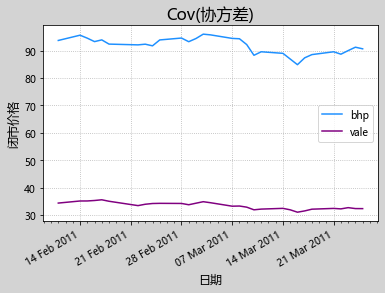

In [17]:
"""
    协方差、相关矩阵、相关系数
        - 协方差：通过两组统计数据计算而得的协方差可以评估两组统计数据的相似程度
            - 样本：
                A = [a₁,a₂,...,an]
                B = [b₁,b₂,...,bn]
            - 平均值
                aver_a = (a₁ + a₂ + ... + an)/n
                aver_b = (b₁ + b₂ + ... + bn)/n
            - 离差  用样本中的每一个元素减去平均数，求得数据的误差程度
                dev_a = [a₁, a₂, ..., an] - aver_a
                dev_b = [b₁, b₂, ..., bn] - aver_b
            - 协方差 协方差可以简单反映两组统计样本的相关性，值为正，则为正相关；值为负，则为负相关，绝对值越大相关性越强。
                cov_ab = aver(dev_a x dev_b)
                cov_ba = aver(dev_b x dev_a)

        - 相关系数 协方差除去两组统计样本标准差的乘积是一个[-1, 1]之间的数。该结果称为统计样本的相关系数。
            - a组样本 与 b组样本做对照后的相关系数
                    cov_ab/(std_a x std_b)
            - b组样本 与 a组样本做对照后的相关系数
                    cov_ba/(std_b x std_a)
            - 比较对照
                     a样本与a样本作对照       二者必然相等      b样本与b样本做对照
                    cov_ab/(std_a x std_b)      =        cov_ba/(std_b x std_a)

            - 若相关系数越接近于0，越表示两组样本越不相关。
            - 若相关系数越接近于1，越表示两组样本正相关。
            - 若相关系数越接近于-1，越表示两组样本负相关。
        - 相关矩阵
            | var_a / (std_a * std_a)      cov_ab / (std_a * std_b) |
            | cov_ba / (std_b * std_a)      var_b / (std_b * std_b) |
            - 矩阵正对角线上的值都为1。（同组样本自己相比绝对正相关）
                |            1                       cov_ab / (std_a * std_b) |
                | cov_ba / (std_b * std_a)                      1             |
            - np.corrcoef(a.b)    相关矩阵
                 返回值:   [[1，ab相关系数], [ba相关系数, 1]]    (备注:[[a与a相关系数,a与b相关系数] , [b与a相关系数,b与b相关系数]])
            - np.cov(a.b)         相关矩阵的分子矩阵(协方差矩阵)
                 返回值:   [[a方差(aa的协方差)，ab协方差] , [ba协方差, b方差(bb的协方差)]]
"""
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import dates as ts
matplotlib.rc("font",family="Microsoft YaHei")

def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
bhp_dates,bhp_close_prices=np.loadtxt(fname="da_data/bhp.csv",delimiter=",", usecols=(1,6),
                               dtype="M8[D],f8",unpack=True,converters={1:dmy2ymd})

vale_dates,vale_close_prices=np.loadtxt(fname="da_data/vale.csv",delimiter=",", usecols=(1,6),
                               dtype="M8[D],f8",unpack=True,converters={1:dmy2ymd})


plt.figure("Cov",facecolor="lightgray")
plt.title("Cov(协方差)",fontdict={"fontsize":16})
plt.xlabel("日期",fontdict={"fontsize":12})
plt.ylabel("闭市价格",fontdict={"fontsize":12})
plt.grid(linestyle=":")

ax = plt.gca()
ax.xaxis.set_major_locator(ts.WeekdayLocator(byweekday=ts.MO))
ax.xaxis.set_major_formatter(ts.DateFormatter("%d %b %Y"))
ax.xaxis.set_minor_locator(ts.DayLocator())
bhp_dates  = bhp_dates.astype(ts.datetime.datetime)

#协方差计算(手动计算)
bhp_mean = np.mean(bhp_close_prices)
vale_mean = np.mean(vale_close_prices)
dev_bhp = bhp_close_prices - bhp_mean
dev_vale = vale_close_prices - vale_mean
cov_bhp_vale = np.mean(dev_bhp*dev_vale)
#相关系数计算(手动计算)
coefficient = cov_bhp_vale / (np.std(bhp_close_prices) * np.std(vale_close_prices))
# print(coefficient,cov_bhp_vale)

#API计算
coefficient = np.corrcoef(bhp_close_prices,vale_close_prices)
m = np.cov(bhp_close_prices,vale_close_prices)
# print(coefficient,m)


# np.cov()
plt.plot(bhp_dates,bhp_close_prices,color="dodgerblue",linestyle="-",label="bhp")
plt.plot(bhp_dates,vale_close_prices,color="purple",linestyle="-",label="vale")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


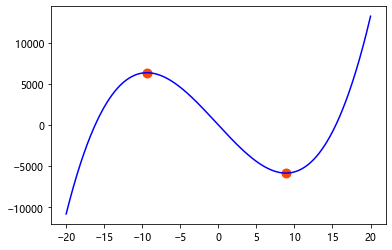

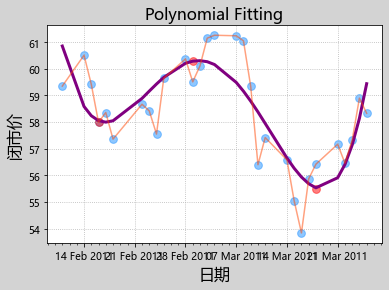

In [18]:
"""
    多项式拟合
        - 多项式一般形式
            y = p0*pow(x,n) + p1*pow(x,n-1) + p2*pow(x,n-2) + ... + pn
            多项式拟合的目的是为了找到一组  p0-pn，使得拟合方程尽可能的与实际样本数据相符合。
        - 假设拟合得到的多项式如下：
            f(x) = p0*pow(x,n) + p1*pow(x,n-1) + p2*pow(x,n-2) + ... + pn
            则拟合函数与真实结果的差方如下
            loss = pow((y1 - f(x1)),2) + pow((y2 - f(x2)),2) + ... + pow((yn - f(xn)),2)
            那么多项式拟合的过程即为求取一组$p_0, p_1, ...,  p_n$, 使得loss的值最小。
            X = [X₁,X₂,...,XN]              自变量
            Y = [Y₁,Y₂,...,YN]              实际函数值
            Y' = [Y₁',Y₂',...,YN']          拟合函数值
            P = [P₀,P₁,...,PN]              多项式函数中的系数

        - 根据一组样本，并给出最高次幂，求出拟合系数
            np.polyfit(X,Y,最高次幂) -> P
        - 根据拟合系数与自变量求出拟合值, 由此可得拟合曲线坐标样本数据 [X, Y']
            np.polyval(P, X) -> Y'
        - 多项式函数求导，根据拟合系数求出多项式函数导函数的系数
            np.polyder(P) -> Q
        - 已知多项式系数Q 求多项式函数的根（与x轴交点的横坐标）
            xs = np.roots(Q)
        - 两个多项式函数的差函数的系数（可以通过差函数的根求取两个曲线的交点）
            Q = np.polysub(P1, P2)
"""
import numpy as np
from matplotlib import dates as dts

#求多项式 y = 4x**3 + 3x**2 - 1000x + 1曲线驻点的坐标。
x = np.linspace(-20,20,1000)

y = 4*np.power(x,3) + 3*np.power(x,2) - 1000*x + 1
Q = np.polyder([4,3,-1000,1])   # f'(x)

xs = np.roots(Q)  # f'(x) = 0 ,xs为求出来的x
#将x带入原方程中
ys = 4*np.power(xs,3) + 3*np.power(xs,2) - 1000*xs + 1
# print(xs,ys)
plt.plot(x,y,linestyle="-",color="blue")
plt.scatter(xs, ys, s=80, c='orangered')
plt.show()

#使用多项式函数拟合两只股票bhp、value的差价函数
'''
    1.计算两只股票的差价
    2.利用多项式拟合求出两只股票差价相近的多项式系数，最高次为4
    3.把该曲线的驻点标出来
'''
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
bhp_dates,bhp_close_prices=np.loadtxt(fname="da_data/bhp.csv",delimiter=",", usecols=(1,6),
                               dtype="M8[D],f8",unpack=True,converters={1:dmy2ymd})

vale_dates,vale_close_prices=np.loadtxt(fname="da_data/vale.csv",delimiter=",", usecols=(1,6),
                               dtype="M8[D],f8",unpack=True,converters={1:dmy2ymd})

bhp_dates = bhp_dates.astype("M8[D]").astype("int32")
diff_price = bhp_close_prices - vale_close_prices

#对差价进行拟合,获得差价函数的系数
coef = np.polyfit(bhp_dates,diff_price,4)
ploy_closing_prices = np.polyval(coef,bhp_dates)  #获取差价曲线坐标
#对该差价函数求导
coef1 = np.polyder(coef)
#令导函数为0,求出x
roots = np.roots(coef1)
#将x带入原方程求出极值
locations = np.polyval(coef,roots)
plt.figure("Polynomial Fitting",facecolor="lightgray")
plt.title("Polynomial Fitting",fontdict={"fontsize":16})
plt.xlabel("日期",fontdict={"fontsize":16})
plt.ylabel("闭市价",fontdict={"fontsize":16})
ax =plt.gca()
ax.xaxis.set_major_locator(dts.WeekdayLocator(byweekday=dts.MO))
ax.xaxis.set_major_formatter(dts.DateFormatter("%d %b %Y"))
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=10)
plt.grid(linestyle=":")
dates = bhp_dates.astype(dts.datetime.datetime)

#画出拟合曲线
plt.plot(dates,ploy_closing_prices,color="purple",linewidth=3,linestyle="-",label="拟合曲线")

#画出差价对应的散点
plt.scatter(dates,diff_price, c='dodgerblue',alpha=0.5, s=60, label='Difference Price')
#画出差价对应的曲线
plt.plot(dates,diff_price, c='orangered',alpha=0.5, label='Difference Price')

roots_x = roots.astype(int).astype('M8[D]').astype(dts.datetime.datetime)
plt.scatter(roots_x,locations, c='red',alpha=0.5, s=60, label='Difference Price')

plt.show()

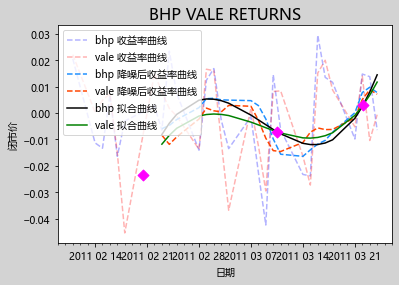

In [19]:
"""
    数据平滑
        数据的平滑处理通常包含有降噪、拟合等操作。降噪的功能意在去除额外的影响因素，拟合的目的意在数学模型化，可以通过更多的数学方法识别曲线特征。
        案例：绘制两只股票收益率曲线。收益率 =（后一天收盘价-前一天收盘价） / 前一天收盘价
        - np.diff(array)        out[i] = a[i+1] - a[i]
        - np.hanning(Number)
            - Number    输出窗口中的点数。如果为零或更小，返回空数组。
            - 返回值     ndarray, shape(M,) 窗口，其最大值归一化为1(值1仅在' M '为奇数时出现)。


"""
import  numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as dts
import matplotlib
matplotlib.rc("font",family="Microsoft YaHei")
#使用卷积完成数据降噪
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,bhp_close_prices=np.loadtxt(fname="da_data/bhp.csv",delimiter=",", usecols=(1,6),
                               dtype="M8[D],f8",unpack=True,converters={1:dmy2ymd})

#dates是一致的，故读第二条数据不需要再读datas了
vale_close_prices=np.loadtxt(fname="da_data/vale.csv",delimiter=",", usecols=(6),
                               dtype="f8",unpack=True)

bhp_profit_rate=np.diff(bhp_close_prices) / bhp_close_prices[:-1]
vale_profit_rate=np.diff(vale_close_prices) / vale_close_prices[:-1]
dates= dates[:-1]
#卷积降噪
convolve_core = np.hanning(8)      #卷积核
convolve_core /= convolve_core.sum()     #使卷积核数组尽可能小
bhp_convolved = np.convolve(bhp_profit_rate,convolve_core,mode="valid")
vale_convolved = np.convolve(vale_profit_rate,convolve_core,mode="valid")
#对降噪后的收益率进行拟合
dates = dates.astype("M8[D]").astype("int32")
bhp_fitting = np.polyfit(dates[7:],bhp_convolved,3)
val_fitting = np.polyfit(dates[7:],vale_convolved,3)
# print(bhp_fitting)
#拿到拟合后的y'坐标
bhp_y_=np.polyval(bhp_fitting,dates[7:])
val_y_=np.polyval(val_fitting,dates[7:])


#通过获取两个函数的焦点可以分析两只股票的投资收益比。
q=np.polysub(bhp_fitting,val_fitting)   #获取多项式函数的差函数的系数
roots_x=np.roots(q)   #求取多项式的根  让f(bhp) - f(vale) = 0  函数的两个根既是两个函数的焦点
roots_x = roots_x.compress( (dates[0] <= roots_x) & (roots_x <= dates[-1]))  #np.compress() 该函数待定
roots_y = np.polyval(bhp_fitting, roots_x)


#绘制曲线
plt.figure('BHP VALE RETURNS',facecolor="lightgray")
plt.title('BHP VALE RETURNS',fontdict={"fontsize":16})
plt.xlabel("日期")
plt.ylabel("闭市价")
ax = plt.gca()
ax.xaxis.set_major_locator(dts.WeekdayLocator(byweekday=dts.MO))
ax.xaxis.set_major_formatter(dts.DateFormatter('%Y %m %d'))
ax.xaxis.set_minor_locator(dts.DayLocator())
dates = dates.astype("M8[D]").astype(dts.datetime.datetime)


#绘制收益线
plt.plot(dates,bhp_profit_rate,color="blue",linestyle="--",label="bhp 收益率曲线",alpha=0.3)
plt.plot(dates,vale_profit_rate,color="red",linestyle="--",label="vale 收益率曲线",alpha=0.3)
#绘制卷积降噪线
plt.plot(dates[7:],bhp_convolved,color="dodgerblue",linestyle="--",label= "bhp 降噪后收益率曲线")
plt.plot(dates[7:],vale_convolved,color="orangered",linestyle="--",label= "vale 降噪后收益率曲线")
#绘制拟合曲线
plt.plot(dates[7:],bhp_y_,color="black",linestyle="-",label= "bhp 拟合曲线")
plt.plot(dates[7:],val_y_,color="green",linestyle="-",label= "vale 拟合曲线")
#绘制这些点
plt.scatter(roots_x, roots_y, marker='D', color='Magenta', s=60, zorder=3)
plt.legend(loc="upper left")
plt.show()


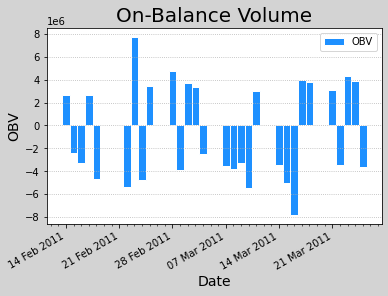

array([ 1,  1,  0, -1, -1])

In [2]:
"""
    符号数组  sign函数可以把样本数组的变成对应的符号数组，正数变为1,负数变为-1,0则变为0
        - np.sign(源数组)      符号函数
        - np.piecewise(源数组,条件序列,取值序列)  数组处理函数
            - 针对源数组中的每一个元素，检测其是否符合条件序列中的每一个条件，符合哪个条件就用取值系列中与之对应的值，
              表示该元素，放到目标 数组中返回。

    净额成交量（OBV）
        - 成交量可以反映市场对某支股票的人气，而成交量是一只股票上涨的能量。一支股票的上涨往往需要较大的成交量。而下跌时则不然。
          若相比上一天的收盘价上涨，则为正成交量；若相比上一天的收盘价下跌，则为负成交量。

"""
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates as dts

#绘制OBV成交量
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    dmy = datetime.strptime(dmy,"%d-%m-%Y")
    return datetime.strftime(dmy,"%Y-%m-%d")


dates,closing_price,volumes = np.loadtxt(fname="da_data/bhp.csv",usecols=(1,6,7),delimiter=","
                                         ,unpack=True,dtype="M8[D],f8,f8",converters={1:dmy2ymd})

diff_closing_price=np.diff(closing_price)
sign_closing_prices = np.sign(diff_closing_price)
obvs = volumes[1:] * sign_closing_prices
plt.figure('On-Balance Volume', facecolor='lightgray')
plt.title('On-Balance Volume', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('OBV', fontsize=14)
ax = plt.gca()

ax.xaxis.set_major_locator(dts.WeekdayLocator(byweekday=dts.MO))
ax.xaxis.set_minor_locator(dts.DayLocator())
ax.xaxis.set_major_formatter(dts.DateFormatter('%d %b %Y'))
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle=':')
dates = dates[1:].astype(dts.datetime.datetime)
plt.bar(dates, obvs, 1.0, color='dodgerblue',
       edgecolor='white', label='OBV')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


# np.piecewise()函数的使用
a = np.array([70,80,60,30,40])
d = np.piecewise(a,[a<60,a==60,a>60],[-1,0,1])
d  #array([ 1,  1,  0, -1, -1])

[4.12310563 5.38516481 6.70820393]
[4.123105625617661 5.385164807134504 6.708203932499369]


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:68: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.


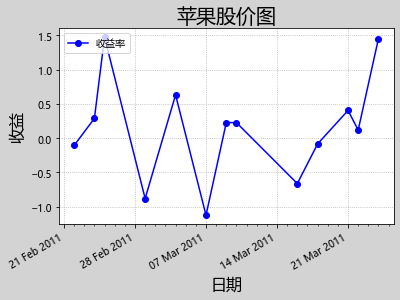

In [44]:
"""
    矢量化 矢量化指的是用数组代替标量来操作数组里的每个元素。
        numpy提供了vectorize和frompyfunc函数，可以把处理标量的函数矢量化，返回的函数可以直接处理ndarray数组。
        - np.vectorize(pyfunc)
            - pyfunc          函数名
        fun = np.frompyfunc(foo, 2, 1) 把foo转换成矢量函数，该矢量函数接收2个参数，返回一个结果

    标量:数与数运算 矢量:数组与数组运算
"""
import numpy as np
from datetime import datetime
import matplotlib
from matplotlib import dates as dts
'''
import math
def foo(x,y):
    return math.sqrt(x**2+y**2)         #如果用np.sqrt()函数,则不用np.vectorize(pyfunc)函数矢量化
x,y = np.array([1,2,3]),np.array([4,5,6])
vectorize_foo=np.vectorize(pyfunc=foo)
z = vectorize_foo(x,y)
print(z)
x,y = np.array([1,2,3]),np.array([4])
np.vectorize(foo)(x,y)              #返回float64数据类型
print(np.frompyfunc(foo,2,1)(x,y))  #结果精度更高,返回object数据类型


'''
#案例：定义一种买进卖出策略，通过历史数据判断这种策略是否值得实施。
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    dmy = datetime.strptime(dmy,"%d-%m-%Y")
    return datetime.strftime(dmy,"%Y-%m-%d")

dates,opening_prices,highest_prices,lowest_prices,closing_prices = np.loadtxt("da_data/bhp.csv",delimiter=",",
                                                                             usecols=(1,3,4,5,6), dtype="M8[D],f8,f8,f8,f8",
                                                                             unpack=True,converters={1:dmy2ymd})

# 定义一种投资策略
def profit(opening_price,highest_price,lowest_price,closing_price):
    #定义买入卖出策略，计算当天收益率
    buy_price = opening_price * 0.99
    if lowest_price <= buy_price <= highest_price:

        return (closing_price - buy_price) *100 / buy_price
    return np.nan
# 矢量化投资函数，求得30天收益率
profits = np.vectorize(profit)(opening_prices,highest_prices,lowest_prices,closing_prices)

nan =np.isnan(profits)  #通过掩码筛出nan的数据
dates, profits = dates[~nan], profits[~nan]   #获取非nan的数据


# gain_dates, gain_profits = dates[profits > 0],profits[profits > 0]
# loss_dates, loss_profits = dates[profits < 0], profits[profits < 0]
#绘制收盘价的折线图
matplotlib.rc("font",family="Microsoft YaHei")

plt.figure("APPL",facecolor="lightgray")
plt.title("苹果股价图",fontdict={"fontsize":20})
plt.xlabel("日期",fontdict={"fontsize":16})
plt.ylabel("收益",fontdict={"fontsize":16})
ax = plt.gca()
ax.xaxis.set_major_locator(dts.WeekdayLocator(byweekday=dts.MO))
ax.xaxis.set_major_formatter(dts.DateFormatter("%d %b %Y"))
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=10)
dates = dates.astype("M8[D]").astype(dts.datetime.datetime)
plt.plot(dates,profits,"o-",color="blue",linestyle="-",label="收益率")

plt.grid(linestyle=":")
plt.legend(loc="upper left")
plt.gcf().autofmt_xdate()
plt.show()

In [32]:
"""
    矩阵
        - 矩阵是numpy.matrix类类型的对象，该类继承自numpy.ndarray，任何针对多维数组的操作，
          对矩阵同样有效，但是作为子类矩阵又结合其自身的特点，做了必要的扩充，比如：乘法计算、求逆等。
        - 矩阵对象的创建
            - 如果copy的值为True(缺省),所得到的矩阵对象与参数中的源容器各自拥有独立的数据拷贝,数据不共享,否则共享同一份数据
                - np.matrix(data, dtype=None, copy=True)
                    - data                  数组(源容器)
                    - dtype                 类型
                    - copy                  是否复制数据(缺省值为True,即复制数据)

            - 由该函数创建的矩阵对象与参数中的源容器一定共享数据，无法拥有独立的数据拷贝
                - np.mat(data, dtype=None)
                    - data                  数组(源容器)
                    - dtype                 类型
                该函数可以接受字符串形式的矩阵描述：数据项通过空格分隔，数据行通过分号分隔。例如：'1 2 3; 4 5 6'
                - np.mat(拼块规则)

            - 矩阵的逆矩阵
                - np.linalg.inv(a)
                    - a                     数组(源容器)
                - matrix.I




"""
import numpy as np

arr = np.arange(10)
#copy = True
matrix = np.matrix(arr,dtype=np.int32)
arr[0] =20
print(arr,matrix)
#,copy = False
matrix = np.matrix(arr,dtype=np.int32,copy=False)
arr[0] =20
print(arr,matrix)
#,copy = False
matrix = np.mat(arr,dtype=np.int32)
arr[0] =25
print(arr,matrix)
#拼块规则
matrix = np.mat("1,2,3;4,5,6")
matrix

##矩阵的逆
matrix = np.mat("1 4 8;4 9 2;1 6 9")

print(matrix)
print(matrix.I)
print(np.linalg.inv(matrix))
print(matrix * matrix.I)
n = 7
# 使用矩阵实现斐波那契数列
print(int((np.mat('1. 1.; 1. 0.') ** (n - 1))[0, 0]))

[20  1  2  3  4  5  6  7  8  9] [[0 1 2 3 4 5 6 7 8 9]]
[20  1  2  3  4  5  6  7  8  9] [[20  1  2  3  4  5  6  7  8  9]]
[25  1  2  3  4  5  6  7  8  9] [[25  1  2  3  4  5  6  7  8  9]]
[[1 4 8]
 [4 9 2]
 [1 6 9]]
[[ 1.30188679  0.22641509 -1.20754717]
 [-0.64150943  0.01886792  0.56603774]
 [ 0.28301887 -0.03773585 -0.13207547]]
[[ 1.30188679  0.22641509 -1.20754717]
 [-0.64150943  0.01886792  0.56603774]
 [ 0.28301887 -0.03773585 -0.13207547]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  5.55111512e-17]
 [-1.66533454e-16 -6.93889390e-18  1.00000000e+00]]
13


[[ 3  3  3  3]
 [ 4  5  6  7]
 [ 8  9 10 10]]
[[ 3  3  3  3]
 [ 4  5  6  7]
 [ 8  9 10 10]]
[[ True  True  True  True]
 [ True False False False]
 [False False False False]]
[[False False False False]
 [ True  True  True False]
 [False False False False]]
[ 6  7  8  9 10 11]
[ 2  4  6  8 10 12 14 16 18 20 22]
66
[ 1  3  6 10 15 21 28 36 45 55 66]
39916800
[       1        2        6       24      120      720     5040    40320
   362880  3628800 39916800]
[[11 12 13 14 15 16 17 18 19 20 21]
 [21 22 23 24 25 26 27 28 29 30 31]
 [31 32 33 34 35 36 37 38 39 40 41]]
[[ 10  20  30  40  50  60  70  80  90 100 110]
 [ 20  40  60  80 100 120 140 160 180 200 220]
 [ 30  60  90 120 150 180 210 240 270 300 330]]
[24.         12.5         8.66666667  6.75        5.6         4.83333333]
[24.         12.5         8.66666667  6.75        5.6         4.83333333]
[24 12  8  6  5  4]
[24. 13.  9.  7.  6.  5.]
[24. 12.  8.  6.  5.  4.]
[24. 12.  9.  7.  6.  5.]
[-1 -3  2 -1  6]
(array([0, 1, 3], dtype=in

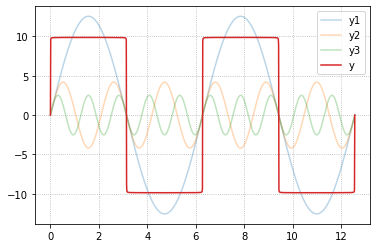

In [1]:
"""
    通用函数
        - 裁剪、压缩
            - 数组的裁剪
                将调用数组中小于和大于下限和上限的元素替换为下限和上限，返回裁剪后的数组，调用数组保持不变。
                    - ndarray.clip(min=下限, max=上限)
            - 数组的压缩
                返回由调用数组中满足条件的元素组成的新数组(只能作用于一维数组).
                    - ndarray.compress(条件)
        - 加法与乘法通用函数
            - 数组的加法
                - np.add(a, a)                          数组的加法
                - np.reduce(a)                          数组的累加
                - np.add.accumulate(a)                  数组的累加和过程
                - np.add.outer([10, 20, 30], a)	        外和
            - 数组的累乘
                - ndarray.prod()        返回调用数组中所有元素组成的新数组
                - ndarray.cumprod()     返回调用数组中所有元素执行累乘的过程数组
                - np.outer()            外积
        - 掩码的计算
            - 或比较
                - np.any(a, axis=None, out=None, keepdims=np._NoValue, *, where=np._NoValue)
                    - a                 数组
                    - axis              轴方向
                    - out               输出数组的位置
                    - keepdims          True/False(如果这个设置为True，则被缩减的轴将留在左边)
                    - where             判断条件
            - 与比较
                - np.all(a, axis=None, out=None, keepdims=np._NoValue, *, where=np._NoValue)
                     - a                 数组
                    - axis              轴方向
                    - out               输出数组的位置
                    - keepdims          True/False
                    - where             判断条件

        - 数组的除法
            - np.true_divide(a,b)       a真除b(对应位置相除)
            - np.divide(a,b)            a真除b
            - np.floor_divide(a,b)      a地板除b(真除的结果向下取整)
            - np.ceil(a / b)            a天花板除b(真除的结果向上取整)
            - np.trunc(a / b)           a截断除b(真除的结果直接干掉小数部分)
            - np.floor(a / b)		    真除的结果向下取整
            - np.round(a / b)		    真除的结果四舍五入取整
        - 位运算通用函数
            位异或：(可以很方便判断两个数据是否同号)
                - c = a ^ b
                - c = a.__xor__(b)
                - c = np.bitwise_xor(a, b)
            位与：
                - e = a & b
                - e = np.bitwise_and(a, b)
            位或：
                - e = a | b
                - e = np.bitwise_or(a, b)
            位反：
                - e = ~a
                - e = np.bitwise_or(a, b)
            移位：
                - <<		__lshift__		left_shift
                - >>		__rshift__		right_shift
        - 三角函数通用函数
            - np.sin()
            - np.cos()
            - np.tan()
            - np.arcsin()
            - np.arccos()
            - np.arctan()

            一个方波由如下参数的正弦波叠加而成：
                y = 4π * sin(x)
                y = 4π/3 * sin(3x)
                    ......
                y = 4π/(2n-1) * sin((2n-1)x)
                曲线叠加的越多，越接近方波。所以可以设计一个函数，接收曲线的数量n作为参数，返回一个矢量函数，
                该函数可以接收x坐标数组，返回n个正弦波叠加得到的y坐标数组。


"""
import numpy as np
arr = np.arange(12).reshape(3,4)
print(arr.clip(min=3, max=10))    #图像卷积时使用
print(np.clip(arr,a_min=3, a_max=10))    #图像卷积时使用


print(np.any(a=[arr>13,arr<5],axis=0))
print(np.all(a=[arr>3,arr<7],axis=0))



arr = np.arange(1,12)
print(arr.compress(arr > 5))    #保留5以上的数据

#加法乘法通用函数
print(np.add(arr,arr))
print(np.add.reduce(arr))
print(np.add.accumulate(arr))
print(np.prod(arr))
print(np.cumprod(arr))
print(np.add.outer([10,20,30],arr))    #三行11列数组,由10,20,30分别加上arr数组构成
print(np.outer([10,20,30],arr))        #三行11列数组,由10,20,30分别乘上arr数组构成

#除法通用函数
a,b = np.arange(24,30),np.arange(1,7)
print(np.true_divide(a, b))
print(np.divide(a, b))
print(np.floor_divide(a, b))
print(np.ceil(a / b))
print(np.trunc(a / b))
print(np.round(a / b))

a = [-1,-3,2,1,6]
b = [-2,5,2,-1,6]
print(np.bitwise_or(a,b))
print(np.where(np.array(a)<2))   #拿到的是下标
print(np.bitwise_and(a,b))
# np.sin()
# np.cos()
# np.tan()
# np.arcsin()
# np.arccos()
# np.arctan()


#合成方波
from matplotlib import pyplot as plt
x = np.linspace(0,np.pi * 4,1000)
y1 = 4 * np.pi*np.sin(x)
y2 = 4/3 * np.pi*np.sin(3*x)
y3 = 4/5 * np.pi*np.sin(5*x)
# y = y1+y2+y3
#叠加1000条曲线
n = 1000
y= np.zeros(n)
for i in range(1,n+1):
    y += 4 / (2 * i - 1) * np.pi * np.sin((2 * i - 1) * x)
plt.grid(linestyle=":")
plt.plot(x,y1,label="y1",alpha=0.3)
plt.plot(x,y2,label="y2",alpha=0.3)
plt.plot(x,y3,label="y3",alpha=0.3)
plt.plot(x,y,label="y")
plt.legend()
plt.show()

[13.8556546  0.1443454  3.       ] [[ 0.48628397  0.81808984  0.26726124]
 [ 0.00910259 -0.57505923 -0.80178373]
 [ 0.87375342 -0.00599085  0.53452248]]


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


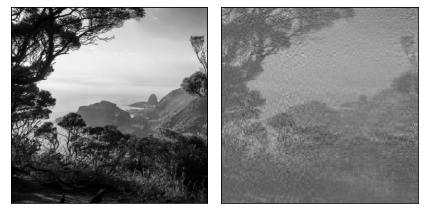

In [3]:
"""
    特征值和特征向量(只支持方阵)
        - 对于n阶方阵A，如果存在数a和非零n维列向量x，使得Ax=ax，则称a是矩阵A的一个特征值，x是矩阵A属于特征值a的特征向量
            - 已知n阶方阵A， 求特征值与特征数组
                - eigvals: 特征值数组
                - eigvecs: 特征向量数组
                eigvals,eigvecs = np.linalg.eig(A)
            - 已知特征值与特征向量，求方阵
                s = eigvecs * np.diag(eigvals) * eigvecs.I
        - np.diag(v,k)
            v       数组(根据v数组生成对角阵)

"""
import numpy as np
A = np.mat("3 4 6;2 3 -1;5 7 11")
#提取特征值
eigvals,eigvecs = np.linalg.eig(A)
print(eigvals,eigvecs)

#原方阵
eigvals[2:] = 0 #抹掉一部分特征值

s = eigvecs * np.diag(eigvals) * eigvecs.I
# print(s)
#案例：读取图片的亮度矩阵，提取特征值与特征向量，保留部分特征值，重新生成新的亮度矩阵，绘制图片。
from scipy import ndimage
from matplotlib import pyplot as plt

#True:提取灰度图片
original = ndimage.imread("1.jpg",True)
original = original[:1700,:1700]        #方阵
#提取特征值
eigvals, eigvecs = np.linalg.eig(original)
# print(original)

eigvals[50:] = 0   #抹掉一部分特征值

new_image=np.mat(eigvecs) * np.mat(np.diag(eigvals)) * np.mat(eigvecs).I
plt.figure("Features")
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(original,"gray")
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(new_image.real,"gray")
plt.tight_layout()
plt.show()

(1707, 1707) (1707,) (1707, 2560)


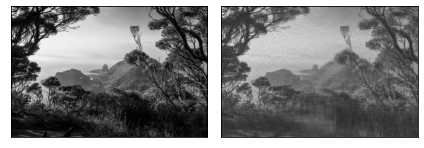

In [20]:
"""
    奇异值分解(支持非方阵)
        有一个矩阵M，可以分解为3个矩阵U、S、V，使得U x S x V等于M。U与V都是正交矩阵（乘以自身的转置矩阵结果为单位矩阵）。
        那么S矩阵主对角线上的元素称为矩阵M的奇异值，其它元素均为0。
        - np.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=Fals)
            - a                     源矩阵
            - full_matrices         True/False(如果为True(默认值),'u'和'vh'具有形状'(…,M,M)和(…,N,N).否则,形状为(…,M,K)和(…,K,N),其中K = min(M, N).)
            - compute_uv
            - hermitian
"""
import numpy as np
from matplotlib import pyplot as plt
M = np.mat('4 11 14;8 7 -2')
# print(M)
#svd奇异值分解   返回的S保存所有奇异值
U,S,V = np.linalg.svd(M,full_matrices=False)
#U、V是正交矩阵
# print(U * U.T)
# print(V * V.T)
# print(V,V.shape)
# print(U * np.diag(S) * V) #原矩阵

import cv2 as cv
img=cv.imread("1.jpg")
#提取灰度图片
original=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
M = np.mat(original)
#奇异值分解
U,S,V=np.linalg.svd(M,full_matrices=False)
S[50:] = 0
print(U.shape,S.shape,V.shape)
original_Image = U * np.diag(S) * V
plt.figure("Features")
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(M,"gray")
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(original_Image,"gray")
plt.tight_layout()
plt.show()

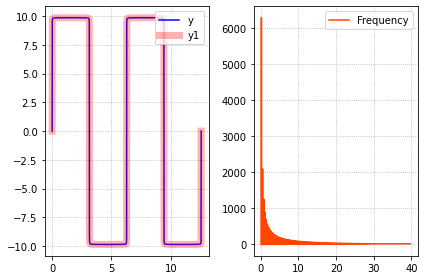

44100 (220500,)


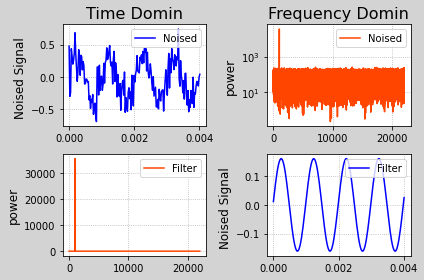

FileNotFoundError: [Errno 2] No such file or directory: '/numpy_result/filter.wav'

In [3]:
"""
    快速傅里叶变换(fft)
        - 什么是傅里叶定理？
            - 法国科学家傅里叶提出傅里叶定理，任何一条周期曲线，无论多么跳跃或不规则，都能表示成一组光滑正弦曲线叠加之和。
        - 什么是傅里叶变换？
            - 傅里叶变换即是将不规则曲线拆解为一组光滑正弦曲线的过程。
            - 傅里叶变换的目的是可将时域（即时间域）上的信号转变为频域（即频率域）上的信号，随着域的不同， 对同一个事物的了解角度也就随之改变，
              因此在时域中某些不好处理的地方，在频域就可以较为简单的处理。这就可以大量减少处理信号存储量。
        - 例如：弹钢琴
            - 假设有一时间域函数：y = f(x)，根据傅里叶的理论它可以被分解为一系列正弦函数的叠加，他们的振幅A，频率ω;或初相位ø;不同：
                  y = A₁sin(ω₁x+ø₁) + A₂sin(ω₂x+ø₂) + A₃sin(ω₃x+ø₃) + R
              所以傅里叶变换可以把一个比较复杂的函数转换为多个简单函数的叠加，看问题的角度也从时间域转到了频率域，有些的问题处理起来就会比较简单。
        - 傅里叶变换相关函数
            - 通过采样数与采样周期求得傅里叶变换分解所得曲线的**频率序列**
                - freqs = np.fft.fftfreq(采样数量, 采样周期)
            - 通过原函数值的序列j经过快速傅里叶变换得到一个复数数组，复数的模代表的是振幅，复数的辐角代表初相位
                - np.fft.fft(原函数数组) -> 复数数组(表示一组正弦函数)
            - 通过复数数组经过逆向傅里叶变换得到**合成的函数值数组*
                - np.fft.ifft(复数数组)->原函数值数组
        - 基于傅里叶变换的频域滤波
            - 含噪信号是高能信号与低能噪声叠加的信号，可以通过傅里叶变换的频域滤波实现降噪。
              通过FFT使含噪信号转换为含噪频谱，去除低能噪声，留下高能频谱后再通过IFFT留下高能信号。
              案例：基于傅里叶变换的频域滤波为音频文件去除噪声。

"""
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0,np.pi * 4,1000)
# y = y1+y2+y3
#叠加1000条曲线
n = 1000
y= np.zeros(n)
for i in range(1,n+1):
    y += 4 / (2 * i - 1) * np.pi * np.sin((2 * i - 1) * x)
plt.subplot(121)
plt.grid(linestyle=":")
plt.plot(x,y,label="y",color="blue")

#傅里叶变换进行拆解
complex_array = np.fft.fft(y)
# print(complex_array[0])
#傅里叶变换进行合成
y1 = np.fft.ifft(complex_array).real
plt.plot(x,y1,label="y1",color="red",linewidth=7,alpha=0.3)
plt.legend(loc="upper right")
#绘制频域图像   频率/能量图像
#通过采样数量与采样周期获取fft的频率数组
freqs = np.fft.fftfreq(y1.size,x[1]-x[0])
pows = np.abs(complex_array)  #复数的摸->能量
plt.tight_layout()
plt.subplot(122)
plt.grid(linestyle=":")
plt.plot(freqs[freqs>0],pows[freqs>0],color="orangered",label="Frequency")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



#案例：基于傅里叶变换的频域滤波为音频文件去除噪声。
#读取音频文件，获取音频文件基本信息：采样个数，采样周期，与每个采样的声音信号值。绘制音频时域的：时间/位移图像。
from scipy.io import wavfile as wf
#采样率(每秒采样点的个数)       采样位移(每个采样点的位移值)
sample_rate,noise_sigs = wf.read("da_data/noised.wav")
print(sample_rate,noise_sigs.shape)
noise_sigs = noise_sigs / (2**15)
#绘制音频时域的：时间/位移图像
times = np.arange(noise_sigs.size)/sample_rate
plt.figure("Filter",facecolor="lightgray")
plt.subplot(221)
plt.title("Time Domin",fontdict={"fontsize":16})
plt.ylabel("Noised Signal ",fontdict={"fontsize":12})
plt.grid(linestyle=":")
plt.plot(times[:178],noise_sigs[:178],color="blue",label="Noised")
plt.legend()
plt.tight_layout()
#基于傅里叶变换，获取音频频域信息，绘制音频频域的：频率/能量图像。
freqs = np.fft.fftfreq(times.size,times[1]-times[0])
complex_array = np.fft.fft(noise_sigs)
pows = np.abs(complex_array)
plt.subplot(222)
plt.title("Frequency Domin",fontdict={"fontsize":16})
plt.ylabel("power",fontdict={"fontsize":12})
plt.grid(linestyle=":")
plt.semilogy(freqs[freqs>0],pows[freqs>0],color="orangered",label="Noised")
plt.legend(loc="upper right")
plt.tight_layout()

# 将低频噪声去除后绘制音频频域的：频率/能量图像。
fund_freq = freqs[pows.argmax()]   #找到能量最大的正弦函数的频率
# print(fund_freq)
noise_index = np.where(freqs != fund_freq)
complex_array[noise_index] = 0  #把噪声位置的复数数据抹掉
pows = np.abs(complex_array)
plt.subplot(223)
plt.ylabel("power",fontdict={"fontsize":12})
plt.grid(linestyle=":")
plt.plot(freqs[freqs>0],pows[freqs>0],color="orangered",label="Filter")
plt.legend(loc="upper right")
plt.tight_layout()
#针对滤波后的复数数组，做逆向的傅里叶变换，绘制时域图像： 时间/位移图像
filter_sigs = np.fft.ifft(complex_array).real
plt.subplot(224)
plt.ylabel("Noised Signal ",fontdict={"fontsize":12})
plt.grid(linestyle=":")
plt.plot(times[:178],filter_sigs[:178],color="blue",label="Filter")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
wf.write('/numpy_result/filter.wav',sample_rate,(filter_sigs * 2 ** 15).astype(np.int16))

In [78]:
"""
    随机数模块(random)
        - 二项分布（binomial）
            - 二项分布就是重复n次独立事件的伯努利试验。在每次试验中只有两种可能的结果，而且两种结果发生与否互相对立，并且相互独立，
              事件发生与否的概率在每一次独立试验中都保持不变。
            - np.random.binomial(n, p, size)
                - n                 表示二项分布中，重复的伯努利试验次数
                - p                 表示二项分布中，事件发生的概率
                - size              表示随机抽样的次数

        - 超几何分布(hypergeometric)
            - np.random.hypergeometric(ngood, nbad, nsample, size)
                - ngood             表示拟检查全部产品中，合格产品数量(N - N₁件)
                - nbad              表示拟检查全部产品中，不合格产品数量(N₁件)
                - nsample           表示抽n件做检查
                - size              表示随机抽样的次数

        - 正态分布(normal)
            - np.random.normal(loc=1, scale=10, size)
                - loc               表示正态分布的期望值
                - scale             表示正态分布的标准差
                - size              表示随机抽样的次数


"""
import numpy as np
# 产生size个随机数，每个随机数来自n次尝试中的成功次数，其中每次尝试成功的概率为p。
bino = np.random.binomial(10,0.3,10)
print(bino)
hgm = np.random.hypergeometric(25,1,3,100)
print(hgm)


[5 3 3 1 4 3 2 2 4 3]
[3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3
 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 2 3 3 2 3 2]


[4 2 1 3 0]
VIVO Mi HuaWei OPPO Apple 

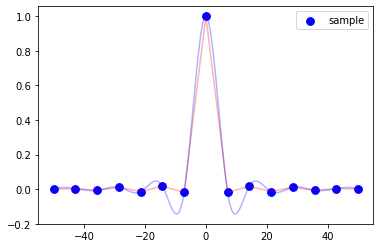

206.8
206.66666666666669


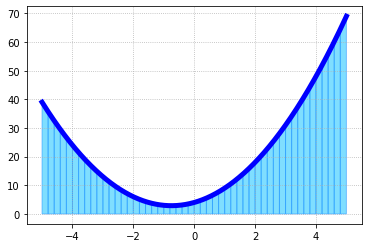

D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:124: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


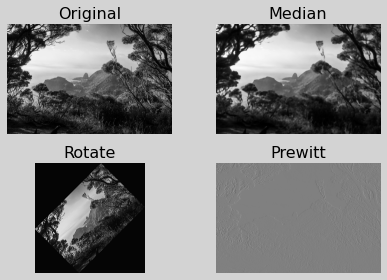

1561.11
-1000.0
-1485.34
1561.11
0.12
-1.2505552149377763e-12
-206.04
5
0.01


In [5]:
"""
    杂项功能
        - 排序
            - 联合间接排序(联合间接排序支持为待排序列排序，若待排序列值相同，则利用参考序列作为参考继续排序。最终返回排序过后的有序索引序列。)
                - indices = np.lexsort((参考序列, 待排序列))
            - 复数数组排序(按照实部的升序排列，对于实部相同的元素，参考虚部的升序，直接返回排序后的结果数组。)
                - np.sort_complex(复数数组)
            - 插入排序(向有序数组中插入元素，使数组依然有序)
                - indices = np.searchsorted(有序数组, 待插入数据数组)
                  np.insert(A, indices, B)
        - 插值(离散数据连续化)
            func = itp.interp1d(x,y,kind) (给插值器函数更多的散点x坐标序列，该函数将会返回相应的y坐标序列。)
                    - x                 离散水平坐标
                    - y                 离散垂直坐标
                    - kind              插值算法(缺省为线性插值,可选择有linear线性插值、cubic三次样条插值：获得一条光滑曲线)

        - 积分
            - 直观地说，对于一个给定的正实值函数，在一个实数区间上的定积分可以理解为坐标平面上由曲线、直线以及轴围成的曲边梯形的面积值（一种确定的实数值）。
              利用微元法认识什么是积分。
            -igt.quad(func, a, b)
                - func                  函数
                - a                     上限
                - b                     下限
        - 图像
            - scipy.ndimage中提供了一些简单的图像处理，如高斯模糊、任意角度旋转、边缘识别等功能。(建议学OpenCV)
                - 高斯模糊
                    - ndimage.median_filter(input, size=None)
                - 角度旋转
                    - rotate = ndimage.rotate(input, angle)
                - 边缘识别
                    - prewitt = ndimage.prewitt(input, axis=-1)
        - 金融相关(原金融相关函数已从库numpy中剔除,所有金融相关函数整合进了numpy-financial库中)
            - 终值 = npf.fv(利率, 期数, 每期支付, 现值)
            - 净现值 = npf.npv(利率, 现金流)
            - 内部收益率 = npf.irr(现金流)
            - 每期支付 = npf.pmt(利率, 期数, 现值)
            - 期数 = npf.nper(利率, 每期支付, 现值)
            - 期数 = 利率 = npf.rate(期数, 每期支付, 现值, 终值)



"""
from scipy import ndimage
import numpy as np
prices = np.array([92,83,71,92,40])
volumes = np.array([100,251,4,12,709])
ind = np.lexsort((volumes,prices))
names = ['Apple','HuaWei','Mi','OPPO','VIVO']
#先按价格排序，价格相同时按销量排序
ind = np.lexsort((volumes, prices))
print(ind)
for i in ind:
	print(names[i], end=' ')

#插入排序
a = np.array([1,3,4,5,7,9])
b = np.array([6,8])
#寻找向a中的哪些位置，插入b中的元素
indices = np.searchsorted(a,b)
#插入元素,向a中的indices位置插入b元素
np.insert(a,indices,b)


#插值
from scipy import interpolate as itp
from matplotlib import pyplot as plt
# ip.interp1d()
#原始数据 11组数据
min_x = -50
max_x = 50
dis_x = np.linspace(min_x,max_x,15)
# print(dis_x)
dis_y = np.sinc(dis_x)
plt.scatter(dis_x,dis_y,s =60,color="blue",marker="o",linewidth=1,label="sample")

#通过样本点生成插值函数
linear = itp.interp1d(dis_x,dis_y,kind="linear")
linear_x = np.linspace(min_x,max_x,1000)
linear_y = linear(linear_x)
plt.plot(linear_x,linear_y,color="red",alpha=0.3)

# 三次样条插值 （CUbic Spline Interpolation） 获得一条光滑曲线
linear = itp.interp1d(dis_x,dis_y,kind="cubic")
linear_x = np.linspace(min_x,max_x,1000)
linear_y = linear(linear_x)
plt.plot(linear_x,linear_y,color="blue",alpha=0.3)
plt.legend()
plt.show()


#积分
from scipy import integrate as igt
from matplotlib import patches as pc
def f(x):
    return 2 * x**2 + 3 * x + 4
a,b = -5,5
x = np.linspace(a,b,1000)

y = f(x)

#使用微元法 求定积分
n = 50
px = np.linspace(a,b,n+1)
py = f(px)
area = 0
#遍历每个梯形，求每个梯形的面积
for i in range(n):
    area+=(py[i+1]+py[i]) *(px[i+1]-px[i])/2
print(area)
print(igt.quad(f,a,b)[0])

plt.grid(linestyle=":")
for i in range(n):
     plt.gca().add_patch(pc.Polygon([
        [px[i],0],[px[i],py[i]],[px[i+1],py[i+1]],[px[i+1],0]],facecolor='deepskyblue', edgecolor='dodgerblue',
        alpha=0.5))

plt.plot(x,y,color="blue",linewidth=5)
plt.show()


#图像相关
from scipy import ndimage
original = ndimage.imread("numpy_data/1.jpg",True)
#高斯模糊
median = ndimage.median_filter(original,21)
#角度旋转
rotate = ndimage.rotate(original, 45)
#边缘识别
prewitt = ndimage.prewitt(original)
plt.figure('Image', facecolor='lightgray')
plt.subplot(221)
plt.title('Original', fontsize=16)
plt.axis('off')
plt.imshow(original, cmap='gray')
plt.subplot(222)
plt.title('Median', fontsize=16)
plt.axis('off')
plt.imshow(median, cmap='gray')
plt.subplot(223)
plt.title('Rotate', fontsize=16)
plt.axis('off')
plt.imshow(rotate, cmap='gray')
plt.subplot(224)
plt.title('Prewitt', fontsize=16)
plt.axis('off')
plt.imshow(prewitt, cmap='gray')
plt.tight_layout()
plt.show()

#金融相关
import numpy as np
import numpy_financial as npf

# 终值 = np.fv(利率, 期数, 每期支付, 现值)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计多少钱？
fv = npf.fv(0.01, 5, -100, -1000)
print(round(fv, 2))
# 现值 = np.pv(利率, 期数, 每期支付, 终值)
# 将多少钱以1%的年利率存入银行5年，每年加存100元，
# 到期后本息合计fv元？
pv = npf.pv(0.01, 5, -100, fv)
print(pv)
# 净现值 = np.npv(利率, 现金流)
# 将1000元以1%的年利率存入银行5年，每年加存100元，
# 相当于一次性存入多少钱？
npv = npf.npv(0.01, [
    -1000, -100, -100, -100, -100, -100])
print(round(npv, 2))
fv = npf.fv(0.01, 5, 0, npv)
print(round(fv, 2))
# 内部收益率 = np.irr(现金流)
# 将1000元存入银行5年，以后逐年提现100元、200元、
# 300元、400元、500元，银行利率达到多少，可在最后
# 一次提现后偿清全部本息，即净现值为0元？
irr = npf.irr([-1000, 100, 200, 300, 400, 500])
print(round(irr, 2))
npv = npf.npv(irr, [-1000, 100, 200, 300, 400, 500])
print(npv)
# 每期支付 = np.pmt(利率, 期数, 现值)
# 以1%的年利率从银行贷款1000元，分5年还清，
# 平均每年还多少钱？
pmt = npf.pmt(0.01, 5, 1000)
print(round(pmt, 2))
# 期数 = np.nper(利率, 每期支付, 现值)
# 以1%的年利率从银行贷款1000元，平均每年还pmt元，
# 多少年还清？
nper = npf.nper(0.01, pmt, 1000)
print(int(nper))
# 利率 = np.rate(期数, 每期支付, 现值, 终值)
# 从银行贷款1000元，平均每年还pmt元，nper年还清，
# 年利率多少？
rate = npf.rate(nper, pmt, 1000, 0)
print(round(rate, 2))


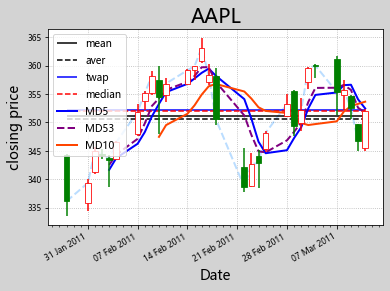

In [29]:
import numpy as np
from datetime import datetime
#计算收盘价算术平均值
def dmy2ymd(dmy):
    dmy = str(dmy,encoding="utf-8")
    time = datetime.strptime(dmy,"%d-%m-%Y").date()
    t = time.strftime("%Y-%m-%d")
    return t
dates,opening_prices,highest_prices,lowest_prices,close_prices,volume=np.loadtxt(fname="da_data/aapl.csv",delimiter=",",usecols=(1,3,4,5,6,7),dtype="M8[D],f8,f8,f8,f8,f8",unpack=True,converters={1:dmy2ymd})

#绘制直线图
from matplotlib import pyplot as plt
from matplotlib import dates as dts
plt.figure("AAPL",facecolor="lightgray")
plt.title("AAPL",fontsize=20)
plt.xlabel("Date",fontsize=14)
plt.ylabel("closing price",fontsize = 14)
plt.grid(linestyle=":")
#拿到坐标轴
ax = plt.gca()
#设置主刻度定位器为周定位器（每周一显示主刻度文本）
ax.xaxis.set_major_locator( dts.WeekdayLocator(byweekday=dts.MO) )
ax.xaxis.set_major_formatter(dts.DateFormatter('%d %b %Y'))
#设置次刻度定位器为日定位器
ax.xaxis.set_minor_locator(dts.DayLocator())
plt.tick_params(labelsize=8)
dates = dates.astype(dts.datetime.datetime)
plt.plot(dates, close_prices, color='dodgerblue',
		linestyle='--',linewidth=2,alpha=0.3)
#整理颜色
rise = close_prices > opening_prices
# 第一种方法
# color = ["red" if c else "green" for c in rise]
# print(color)
# 第二种利用掩码
color = np.zeros(rise.size,dtype="U5")
color[:] = "green"
color[rise] = "white"


#算术平均值
means=np.mean(close_prices)
plt.hlines(means,dates[0],dates[-1],colors="black",label="mean")

#加权平均值
aver = np.average(close_prices,weights=volume)
plt.hlines(aver,dates[0],dates[-1],colors="black",linestyles="--",label="aver")

#时间加权平均值
times = np.linspace(1,10,close_prices.size)
twap  = np.average(close_prices,weights=times)
plt.hlines(twap,dates[0],dates[-1],colors="blue",linestyles="-",label="twap")

#中位数
median = np.median(close_prices)
plt.hlines(median,dates[0],dates[-1],color="red",linestyles="--",label="median")

#绘制5日移动均线（for循环版）
'''
ma5 = np.zeros(close_prices.size - 4)    #用于第5天到第26天的数据
for i in range(ma5.size):
    #前5日均线从第五日开始画图
    ma5[i]=close_prices[i:i+5].mean()
plt.plot(dates[4:],ma5,color="blue",linestyle="-",linewidth=2,label="MD5")
'''


#绘制5日移动均线（卷积版）
sma52 = np.convolve(close_prices,np.ones(5)/5,mode="valid")
plt.plot(dates[4:],sma52,color="blue",linestyle="-",linewidth=2,label="MD5")




#绘制5日移动均线（加权卷积版）
x = np.linspace(-1,0,5)
kernel = np.exp(x)[::-1]   #y=e**x在-1到0是y的值波动范围小
kernel = kernel/kernel.sum()
sma53 = np.convolve(close_prices,kernel,mode="value")
plt.plot(dates[4:],sma53,color="purple",linestyle="--",linewidth=2,label="MD53")


#绘制10日移动均线(卷积版)
sma10 = np.convolve(close_prices,np.ones(10)/10,mode="valid")
plt.plot(dates[9:],sma10,color="orangered",linestyle="-",linewidth=2,label="MD10")


edgecolor = ["red" if c else "green" for c in rise]
#绘制实体
plt.bar(dates,close_prices-opening_prices,linewidth=0.8,color=color,bottom=opening_prices,edgecolor=edgecolor,zorder=3)
#绘制影线
plt.vlines(dates,ymin=lowest_prices,ymax=highest_prices,color=edgecolor)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()